# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
## Import Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time


In [9]:
## Weather API key
from api_keys import weather_api_key

In [10]:
## Import citipy
from citipy import citipy

## Generate Cities List

In [11]:
## Latitude and longitude ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Cities list and latitudes-longitudes list
cities = []
lats_lngs_list = []


In [12]:
## Radomize latitudes and longitudes, and set combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1300)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1300)
lats_lngs_list = zip(lats,lngs)

In [13]:
## Find nearest city for latitude and longitude combination using citipy
for i in lats_lngs_list:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    ## If city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
        
## Confirm count is above 500
print(len(cities))

568


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
## Perform a weather check on each city

## Set up lists to hold reponse info
city_list = []
temps = []
humidity = []
clouds = []
winds = []
latitudes = []
longitudes = []
countries = []
date = []

In [15]:
## Set URL and Units
#url = "https://openweathermap.org/api"
units = "imperial"
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='


In [16]:
## Loop counters
counter = 0
set_counter = 1

In [17]:
## Loop through the list of cities and perform a request for data on each
for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        if counter > 50:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print(f"Processing Record {counter} of Set {set_counter} | {i}")
    except:
        print("City not found. Skipping request...")
print("--------------\nData Retrieval Complete\n--------------")

Processing Record 1 of Set 1 | alyangula
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | port alfred
City not found. Skipping request...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | biak
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | rovaniemi
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | carnarvon
City not found. Skipping request...
Processing Record 14 of Set 1 | sao joao da barra
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | cartagena
Processing Record 17 of Set 1 | kharp
City not found. Skipping request...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | cabo san lucas
City not found. Skipping request...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of

Processing Record 25 of Set 4 | pangkalanbuun
Processing Record 26 of Set 4 | amapa
Processing Record 27 of Set 4 | saint-joseph
Processing Record 28 of Set 4 | pangnirtung
City not found. Skipping request...
Processing Record 29 of Set 4 | pacific grove
Processing Record 30 of Set 4 | east london
Processing Record 31 of Set 4 | souillac
City not found. Skipping request...
Processing Record 32 of Set 4 | kalmunai
Processing Record 33 of Set 4 | sault sainte marie
Processing Record 34 of Set 4 | margate
Processing Record 35 of Set 4 | quito
Processing Record 36 of Set 4 | hirtshals
Processing Record 37 of Set 4 | hobyo
Processing Record 38 of Set 4 | santa cruz
Processing Record 39 of Set 4 | dubbo
Processing Record 40 of Set 4 | synya
Processing Record 41 of Set 4 | san rafael del sur
Processing Record 42 of Set 4 | podgornoye
Processing Record 43 of Set 4 | holbeach
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | muhos
Processing Record 46 of Set 4 | kysyl-syr
P

Processing Record 10 of Set 8 | ballina
Processing Record 11 of Set 8 | ulladulla
Processing Record 12 of Set 8 | aksu
Processing Record 13 of Set 8 | luba
Processing Record 14 of Set 8 | ulaanbaatar
Processing Record 15 of Set 8 | privolzhye
Processing Record 16 of Set 8 | livny
Processing Record 17 of Set 8 | palmer
City not found. Skipping request...
Processing Record 18 of Set 8 | luau
Processing Record 19 of Set 8 | santa lucia
Processing Record 20 of Set 8 | gigmoto
City not found. Skipping request...
Processing Record 21 of Set 8 | sitia
Processing Record 22 of Set 8 | yulara
Processing Record 23 of Set 8 | mount darwin
City not found. Skipping request...
Processing Record 24 of Set 8 | alice springs
Processing Record 25 of Set 8 | victor harbor
Processing Record 26 of Set 8 | erzin
Processing Record 27 of Set 8 | muswellbrook
City not found. Skipping request...
Processing Record 28 of Set 8 | zeya
Processing Record 29 of Set 8 | kholmogory
Processing Record 30 of Set 8 | sabha


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_df = pd.DataFrame({"City": city_list, 
                "Latitude": latitudes, 
                "Longitude": longitudes, 
                "Humidity": humidity, 
                "Max Temp": temps, 
                "Cloudiness": clouds, 
                "Wind Speed": winds, 
                "Country": countries, 
                "Date": date,
                })



In [19]:
weather_df.count()

City          502
Latitude      502
Longitude     502
Humidity      502
Max Temp      502
Cloudiness    502
Wind Speed    502
Country       502
Date          502
dtype: int64

In [20]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,alyangula,-13.8483,136.4192,70,87.80,40,10.36,AU,1619837064
1,ushuaia,-54.8000,-68.3000,100,37.40,90,2.30,AR,1619837065
2,port alfred,-7.0349,29.7638,82,71.38,100,3.36,CD,1619837065
3,hermanus,-34.4187,19.2345,80,53.01,0,1.01,ZA,1619836991
4,tura,25.5198,90.2201,33,90.59,16,2.37,IN,1619837065


In [21]:
## export to csv
weather_df.to_csv("weather_data")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
weather_df.describe()

,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,22.685028,20.351882,67.161355,62.161972,54.928287,7.550737,1.619837e+09
std,31.727158,88.411231,23.227673,19.191397,40.678022,5.412279,6.772935e+01
min,-54.800000,-175.200000,7.000000,12.200000,0.000000,0.510000,1.619837e+09
25%,-2.681000,-52.857850,52.000000,48.200000,10.000000,3.440000,1.619837e+09
50%,28.366800,22.286300,73.000000,66.200000,69.000000,6.140000,1.619837e+09
75%,48.906275,97.937675,84.000000,78.367500,98.000000,10.007500,1.619837e+09
max,78.218600,179.316700,100.000000,91.530000,100.000000,31.070000,1.619837e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.
## Max Humidity in the DataFrame.describe is 100, so I believe none are greater than 100.

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

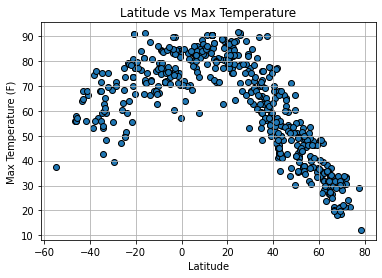

In [25]:
x_values = weather_df["Latitude"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Max Temperature.png")

plt.show()


The scatter plot above is analyzing the max temperature values based on distance from the equator (0° Latitude).  The temps rise as you get closer to the equator.

## Latitude vs. Humidity Plot

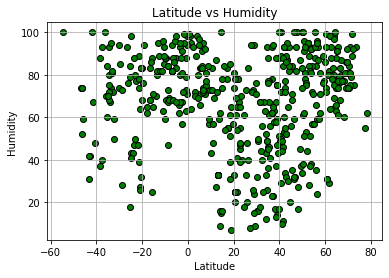

In [26]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black", color= "green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Humidity.png")

plt.show()


The scatter plot above is analyzing the humidity values based on distance from the equator (0° Latitude).  The humidity levels don't seem to have a clear trend in regards to equator.

## Latitude vs. Cloudiness Plot

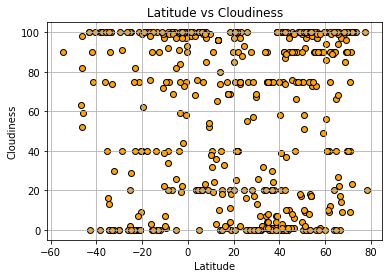

In [27]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black", color= "orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Cloudiness.png")

plt.show()


The scatter plot above is analyzing the cloudiness levels based on distance from the equator (0° Latitude). There looks to be no correlation between the cloudiness and a city's latitude.

## Latitude vs. Wind Speed Plot

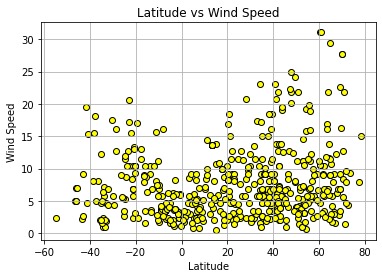

In [28]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values,y_values, marker= "o", edgecolor= "black", color= "yellow")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid()

# Save figure as .png
plt.savefig("Latitude vs Wind Speed.png")

plt.show()


The scatter plot above is analyzing the wind speeds based on distance from the equator (0° Latitude). There appears to be no releationship between the wind speed and a city's latitude.

## Linear Regression

In [29]:
## Create a df for both the northern and southern hemispheres
northern_df = weather_df.loc[(weather_df["Latitude"] >= 0)]
southern_df = weather_df.loc[(weather_df["Latitude"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8985401607291114


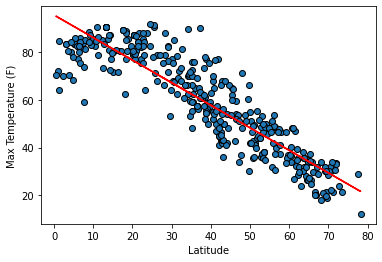

In [30]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_Max_Temp.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.6117879154429687


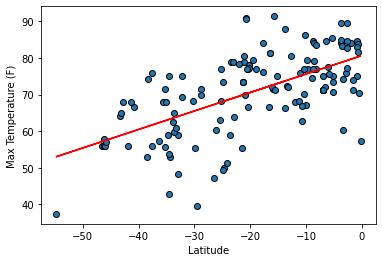

In [31]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_Max_Temp.png")

plt.show()


Seeing the scatter plots and linear regression for both hemispheres, there is strong relationship between temperature and a city's distance from the equator (0° Latitude).  The Northern Hemisphere's line shows the temperatures decreases as city locations are further from the equator, and the Southern hemisphere's line shows temeratures increasing as city's are closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.22586913153132543


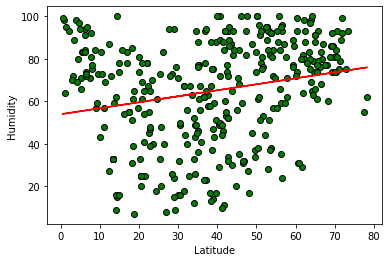

In [32]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "green")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_Humidity.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.25327009946409


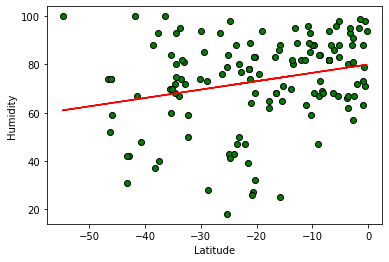

In [33]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "green")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_Humidity.png")

plt.show()


Based on the line/plots and the r-square scores, the is not a strong correlation between city latitude and humidity level in either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.077747933666094


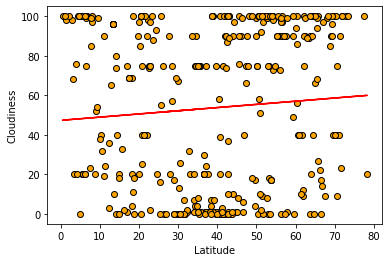

In [34]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "orange")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_Cloudiness.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.09930227845217951


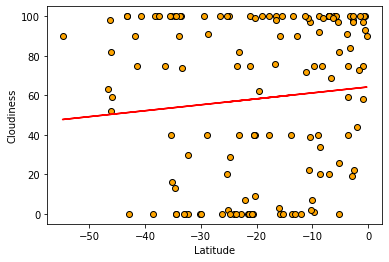

In [35]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "orange")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_Cloudiness.png")

plt.show()


Based on the line/plots and the r-square scores, the is not a strong correlation between city latitude and cloudiness in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.20181687571178558


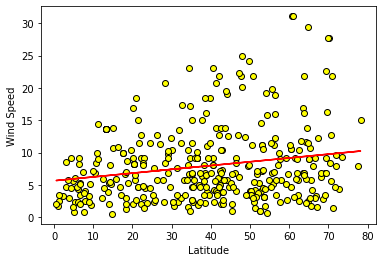

In [36]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "yellow")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("NH_Latitude_vs_WindSpeed.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.23324494014474528


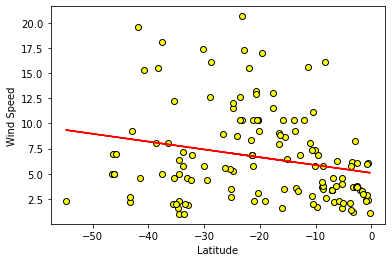

In [37]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker= "o", edgecolor= "black", color= "yellow")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-squared: {rvalue}")

# Save figure as .png
plt.savefig("SH_Latitude_vs_WindSpeed.png")

plt.show()


Based on the line/plots and the r-square scores, the is not a strong correlation between city latitude and wind speeds in either hemisphere.